# Data Ingestion

In [7]:
# Read data from csv
import pandas as pd
bike_rentals=pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Predicting Bike Rentals/bike_rental_hour.csv")


# Data Exploration

In [8]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Let's explore how count is distributed across our dataset. We can create a simple Histogram to visualize the column.

(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

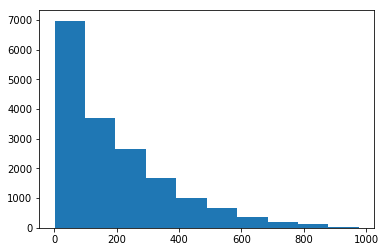

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(bike_rentals['cnt'])

In [45]:
import pandas_profiling
pandas_profiling.ProfileReport(bike_rentals)

/Applications/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Applications/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, i

Number of variables,13
Number of observations,17379
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,104.0 B
Numeric,10
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


## Identifiy correlation between the variables

In [11]:
bike_rentals.corr(method='pearson')['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

# Data Cleaning

cnt is derived from casual and registered columns. If we're trying to predict the number of people who rent bikes in a given hour (cnt), it doesn't make sense that we already know casual or registered, because those numbers are added together to get cnt.

In [12]:
bike_rentals=bike_rentals.drop(['casual', 'registered','dteday'], axis=1)

Variable hr represents time duration for which the bike was rented. But, here we need to be careful about how we perceive time. For instance, the time of the day when the rental started will have impact on the number of hours bike is rented. Let us dig deeper. A person renting bike in the morning may follow a different pattern of hiring the bike as compared to someone who rents the bike in the evening or night. For this reason, let us create 4 bins to incorporate the same.   

In [13]:
def assign_label(column):
    if column>6 and column <=12:
        return 1
    if column>12 and column <=18:
        return 2
    if column>18 and column <=24:
        return 3
    if column>=0 and column <=6:
        return 4
    

In [14]:
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)

In [15]:
bike_rentals['time_label'].head()

0    4
1    4
2    4
3    4
4    4
Name: time_label, dtype: int64

# Check for missing values

In [17]:
bike_rentals.isnull().any()

instant       False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
time_label    False
dtype: bool

# Error metric

As this is a regression problem, we have choice of metrics, mse and rse. Let's pick mse as the error metric for the time being.

In [18]:
bike_rentals.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,time_label
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,4
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,4
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,4
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,4
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,4


In [19]:
import pandas as pd
#bike_rentals=pd.DataFrame(dtype=float)
bike_rentals=bike_rentals.apply(pd.to_numeric)

# Splitting data into Train and Test sets

In [20]:
from sklearn.model_selection import train_test_split
X=bike_rentals.iloc[:,bike_rentals.columns!="cnt"]
y=bike_rentals.iloc[:,bike_rentals.columns=="cnt"]
X_train,X_test, y_train ,y_test=train_test_split(X,y,test_size=0.2)


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_test.dtypes

(13903, 14)
(3476, 14)
(13903, 1)
(3476, 1)


cnt    int64
dtype: object

# Data Modelling

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
model=LinearRegression()




## Train/Test the Linear Regression Model

In [23]:
model.fit(X_train,y_train)
test_pred=model.predict(X_test)
train_pred=model.predict(X_train)



## Calculate Error metric for Linear Regression model

In [24]:
print(test_pred.shape)
print(train_pred.shape)
print(y_test.shape)
print(y_train.shape)
print(type(test_pred))
print(type(train_pred))
print(type(y_test))
print(type(y_train))

(3476, 1)
(13903, 1)
(3476, 1)
(13903, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [25]:
test_mse=np.mean((test_pred - y_test) ** 2)
train_mse=np.mean((train_pred - y_train) ** 2)
print(test_mse)
print(train_mse)

cnt    16673.994127
dtype: float64
cnt    16058.857664
dtype: float64


In [26]:
accuracy=[]
accuracy.append(test_mse)

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(min_samples_leaf=5)

## Train/Test the DecisionTreeRegressor Model

In [28]:
model.fit(X_train,y_train)
test_pred1=model.predict(X_test)
train_pred1=model.predict(X_train)

## Calculate Error metric for DecisionTreeRegressor model

In [29]:
print(test_pred1.shape)
print(train_pred1.shape)
print(y_test.shape)
print(y_train.shape)
print(type(test_pred1))
print(type(train_pred1))
print(type(y_test))
print(type(y_train))
test_pred1=test_pred1.reshape((3476,1))
train_pred1=train_pred1.reshape((13903,1))


(3476,)
(13903,)
(3476, 1)
(13903, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:

test_mse=np.mean((test_pred1 - y_test) ** 2)
train_mse=np.mean((train_pred1 - y_train) ** 2)
print(test_mse)
print(train_mse)



accuracy.append(test_mse)
#accuracy.append(train_mse)


cnt    2834.288543
dtype: float64
cnt    1031.891194
dtype: float64


## Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(min_samples_leaf=5)

## Train/Test the RandomForestRegressor Model

In [32]:
model.fit(X_train,y_train)
test_pred2=model.predict(X_test)
train_pred2=model.predict(X_train)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [33]:
print(test_pred2.shape)
print(train_pred2.shape)
print(y_test.shape)
print(y_train.shape)
print(type(test_pred2))
print(type(train_pred2))
print(type(y_test))
print(type(y_train))
test_pred2=test_pred2.reshape((3476,1))
train_pred2=train_pred2.reshape((13903,1))

(3476,)
(13903,)
(3476, 1)
(13903, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Calculate Error metric for RandomForestRegressor model

In [34]:

test_mse=np.mean((test_pred2 - y_test) ** 2)
train_mse=np.mean((train_pred2 - y_train) ** 2)
print(test_mse)
print(train_mse)

accuracy.append(test_mse)
#accuracy.append(train_mse)



cnt    2103.968714
dtype: float64
cnt    1105.327514
dtype: float64


In [35]:
classifiers=['Linear Regression',  'Decision Tree','Random Forest']
accuracy_df=pd.DataFrame(accuracy,index=classifiers)   
accuracy_df.columns=['Model Performace']    
accuracy_df


,Model Performace
Linear Regression,16673.994127
Decision Tree,2834.288543
Random Forest,2103.968714


# Model Comparison

Considering decision tree regressor(Nonlinear predictor), we acheived much higher accuracy than linear regression. On comparing the mse of Linear, Decision Tree and Random Forest models, we observed Random Forest performs far better than the earlier two. The better performance of random forest over decision tree should be attributed to it's inherent capability of removing single Decision Tree's overfitting. 